In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import datetime
import torch
import os
import importlib
import sys
import re
import pickle
from IPython.display import clear_output
from mpl_toolkits import mplot3d
from io import BytesIO
from math import log, exp, tan, atan, ceil
from PIL import Image

#from utils import dataset_utils
from utils import dataset_utils
from utils import createAISdata
#from utils import protobufDecoder
from utils import plotting
from models import VRNN
from Config import config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f">> Using device: {device}")
#timestamp = datetime.datetime.fromtimestamp(update.t_epoch_sec).strftime('%d/%m/%Y %H:%M:%S')

>> Using device: cuda:0


In [2]:
shiptypes = config.SHIPTYPE_CARGO + config.SHIPTYPE_TANKER
shipFileName = 'CargTank_1911'
binedges = (config.LAT_EDGES, config.LON_EDGES, config.SOG_EDGES, config.COG_EDGES)
batch_size = 4

In [21]:
with open(r"C:\Users\carlo\workspace\special_course\data\report\trainingCurves_CargTank_1911_dropoutEncoderDecoderDot2.pkl", 'rb') as file:
    epochs = pickle.load(file)
    num = len(epochs['loss_tot'])
    '''
    print('Number of epochs completed: {}'.format(num))
    for i in range(num):
        print('\nEpoch {}:'.format(i+1))
        for key in epochs.keys():
            print('{}: {}'.format(key, epochs[key][i]))
    '''

In [4]:
def training_plots(loss_tot, kl_tot, recon_tot, val_loss_tot, val_kl_tot, val_recon_tot):
        
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    
    ax[0].plot(loss_tot, label='Training Loss')
    ax[0].plot(val_loss_tot, label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()
    
    ax[1].plot(kl_tot, label='Training KL-divergence')
    ax[1].plot(val_kl_tot, label='Validation KL-divergence')
    ax[1].set_title('KL divergence')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    
    ax[2].plot(recon_tot, label='Training Reconstruction')
    ax[2].plot(val_recon_tot, label='Validation Reconstruction')
    ax[2].set_title('Reconstruction probability log_prob(x)')
    ax[2].set_xlabel('Epoch')
    ax[2].legend()

## Latent size = 50

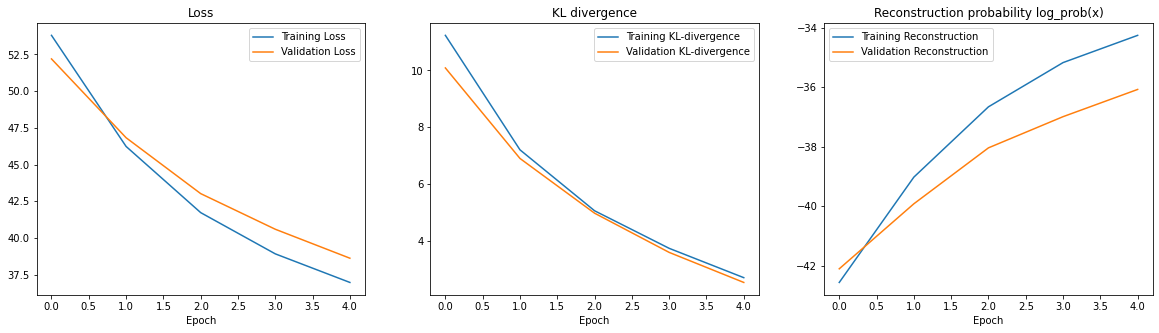

In [5]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 64

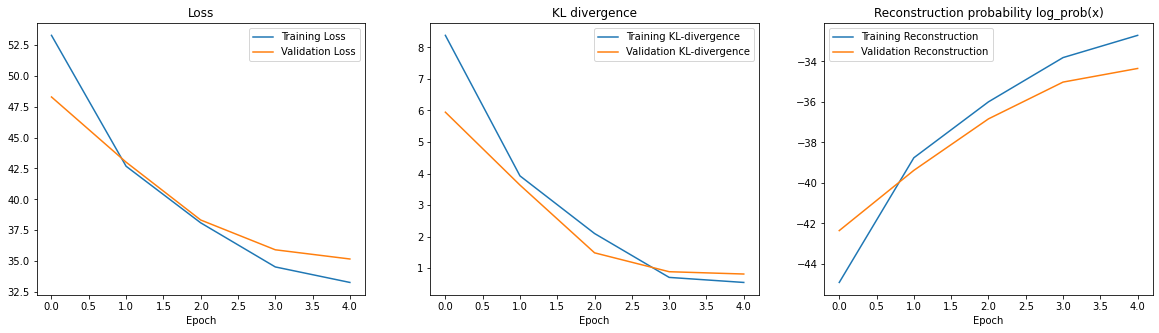

In [7]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 75

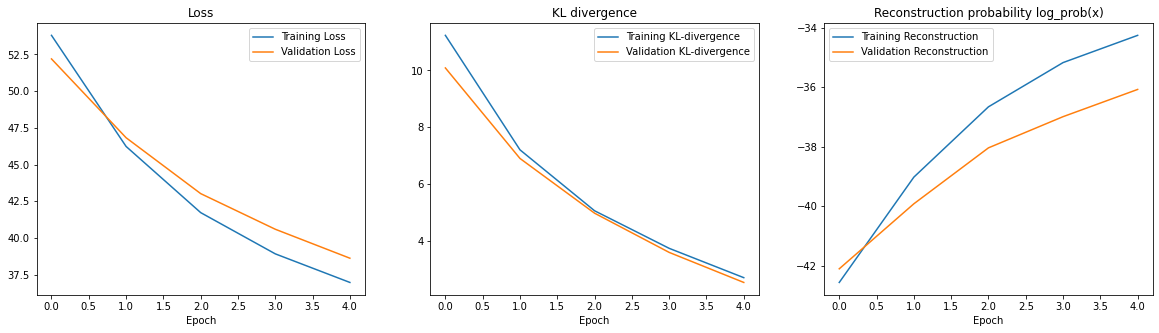

In [12]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 85

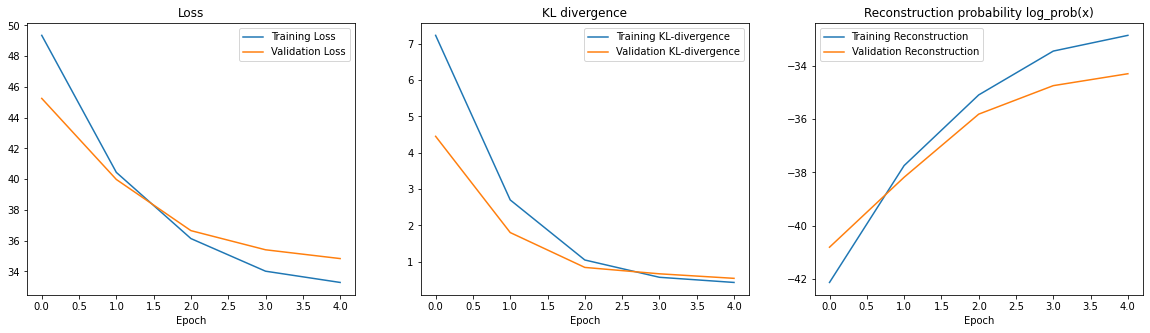

In [10]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Baseline (latent size = 100)

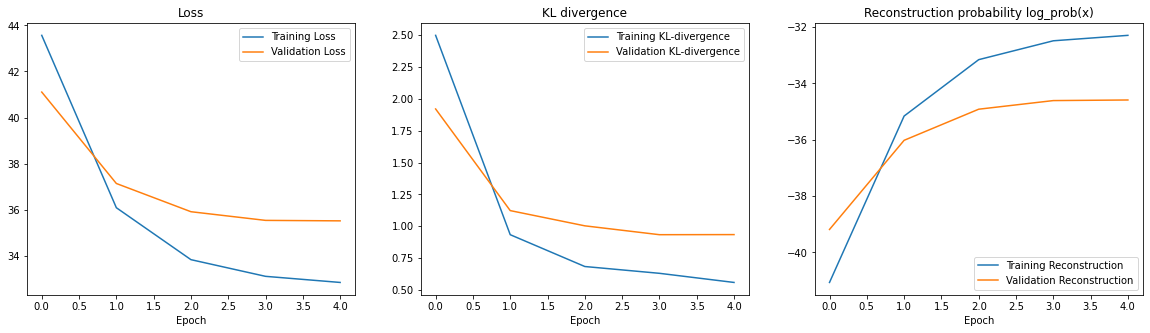

In [16]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 110

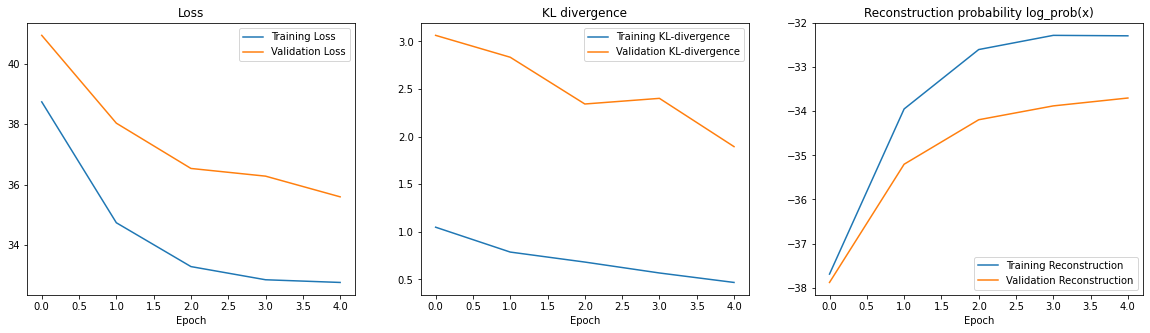

In [12]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## Latent size = 200

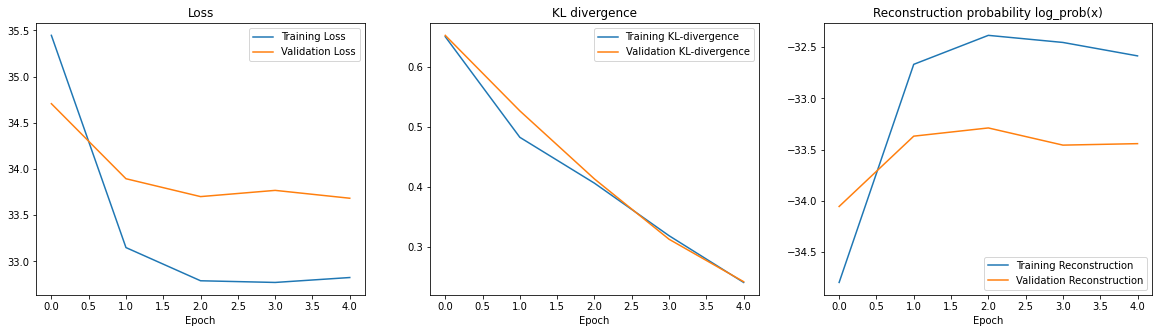

In [14]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

# DROPOUT (p=0.2)

## In the Decoder

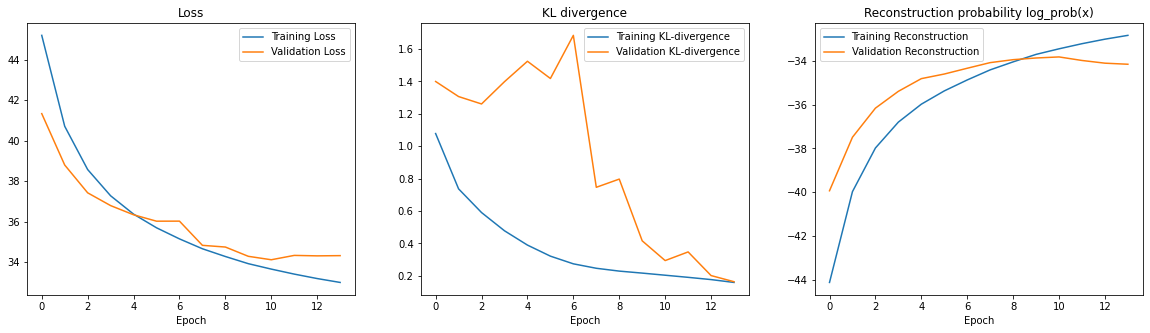

In [18]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## In the Encoder

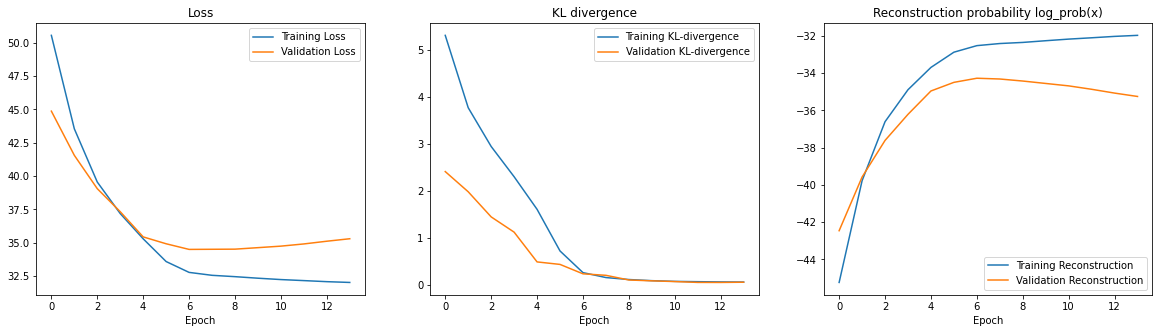

In [20]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])

## In both: Encoder & Decoder

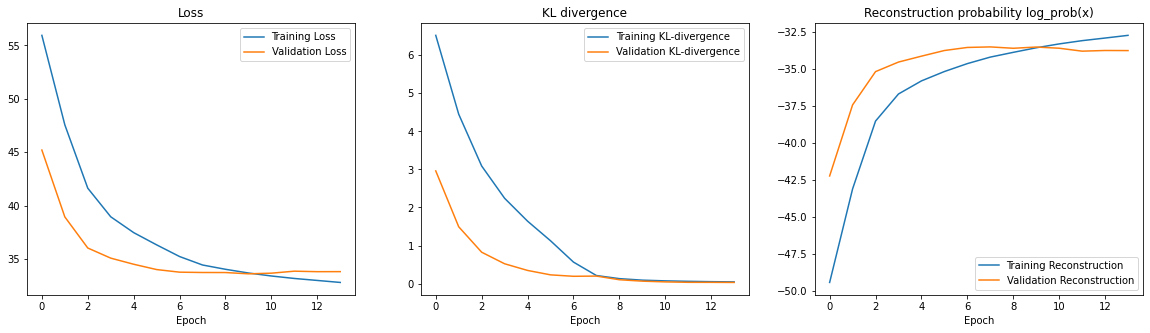

In [22]:
training_plots(epochs['loss_tot'][1:], epochs['kl_tot'][1:], epochs['recon_tot'][1:], epochs['val_loss_tot'][1:], 
               epochs['val_kl_tot'][1:], epochs['val_recon_tot'][1:])